# Basic Usage

### Setup
This tutorial notebook will walk you through the basic usage of the OTTER API. First make sure you followed the installation structions to install otter and the data. First the imports we will need for the notebook

In [1]:
import os
import otter

from astropy.coordinates import SkyCoord
from astropy import units as u

import matplotlib.pyplot as plt

This notebook will assume that you have set the `OTTER_ROOT` environment variable, but if you haven't all you need to do is change the following variable to the correct path.

In [2]:
# THIS IS WHAT YOU CHANGE IF YOU HAVE THE DATA IN A DIFFERENT PATH
otterpath = os.path.join(os.environ['OTTER_ROOT'], 'otterdb', '.otter') 

Now that we have the `otterpath` we can initiate the otter database object and then generate a summary table of all of the data:

In [3]:
db = otter.Otter(otterpath)
summary = db.generate_summary_table(save=True)

summary

/home/noahf/anaconda3/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/home/noahf/anaconda3/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


,name,alias,ra,dec,refs,discovery_date,hasPhot,hasSpec,json_path,z
0,ASASSN-20il,"[ASASSN-20il, AT 2020pom]",75d47m49.5s,-22d48m52.1s,[ASAS-SN Supernovae],2020-07-08 04:19:12.000,False,False,/home/noahf/astro-otter/otterdb/.otter/ASASSN-...,NaN
1,NGC 247,[NGC 247],11d47m09.6s,-20d45m36s,"[2017ApJ...838..149A, 2016A&A...594A..13P, 201...",NaN,False,False,/home/noahf/astro-otter/otterdb/.otter/NGC-247...,0.000531
2,SDSSJ1350,[SDSSJ1350],207d30m22.65s,29d16m09.71s,"[2017ApJ...838..149A, 2016A&A...594A..13P, 201...",NaN,True,False,/home/noahf/astro-otter/otterdb/.otter/SDSSJ13...,0.0777
3,SDSSJ1201,[SDSSJ1201],180d24m00.45s,30d03m05.52s,"[2017ApJ...838..149A, 2016A&A...594A..13P, 201...",2010-06-10 00:00:00.000,True,False,/home/noahf/astro-otter/otterdb/.otter/SDSSJ12...,0.146
4,SDSSJ1342,[SDSSJ1342],205d41m06.3s,5d30m56.14s,"[2017ApJ...838..149A, 2016A&A...594A..13P, 201...",2009-05-17 00:00:00.000,True,False,/home/noahf/astro-otter/otterdb/.otter/SDSSJ13...,0.0366
...,...,...,...,...,...,...,...,...,...,...
98,AT2019qiz,"[AT2019qiz, AT2019qiz (= ZTF19abzrhgq)]",71d39m29.85s,-10d13m31.5s,"[2020arXiv200602454N, 2016A&A...594A..13P, ASA...",2019-09-24 09:50:24.000,False,False,/home/noahf/astro-otter/otterdb/.otter/AT2019q...,0.01513
99,XMMSL1 J0740-85,"[XMMSL1 J0740-85, XMMSL1 J074008.2-853927]",115d02m02.85s,-85d39m31.25s,"[2017ApJ...838..149A, 2016arXiv161001788S, 201...",2014-04-01 00:00:00.000,True,False,/home/noahf/astro-otter/otterdb/.otter/XMMSL1-...,0.0173
100,ASASSN-14ae,"[ASASSN-14ae, iPTF14aiv]",167d10m01.65s,34d05m52.4s,"[2017ApJ...838..149A, 2016A&A...594A..13P, 201...",2014-01-25 12:14:24.000,True,False,/home/noahf/astro-otter/otterdb/.otter/ASASSN-...,0.043671
101,PS1-12yp,"[PS1-12yp, CSS120301:133156+235405, SDSSJ133155]",202d58m58.65s,23d54m05.7s,"[2017ApJ...838..149A, 2016MNRAS.463..296L, 201...",2012-03-01 00:00:00.000,True,False,/home/noahf/astro-otter/otterdb/.otter/PS1-12y...,NaN


### Querying the OTTER Catalog

Now that we have the catalog read in an initiated, we can query it for the data we want. Say we want to get all of the data associated with the TDE Sw J1644+57, we can use

In [4]:
swj1644_list = db.query(names='Sw J1644+57')
swj1644_list

[Transient(
 	Name: Sw J1644+57,
 	Keys: dict_keys(['classification', 'schema_version', 'name', 'coordinate', 'filter_alias', 'distance', 'date_reference', 'photometry', 'reference_alias'])
 )]

Which you can see is a list of otter `Transient` objects. You can essentially treat this like a python dictionary with some benefits:
* It has additional helpful methods to access and clean the data
* You can use the HDF5 slash-syntax. Ex.) `swj1644['name/alias']` will give you all of the aliases from the `alias` subkey in the `name` key

In [5]:
swj1644 = swj1644_list[0] # just to get rid of the list

swj1644['name/alias']

[{'value': 'Swift J1644+57',
  'reference': ['2017ApJ...838..149A', '2011Sci...333..203B']},
 {'value': 'GRB 110328A', 'reference': ['2011Sci...333..203B']},
 {'value': 'Swift J164449.3+573451', 'reference': ['2011Sci...333..203B']},
 {'value': 'Sw J1644+57', 'reference': ['Swift']}]

So this TDE has multiple aliases associated with it! Let's try to query by a different one

In [6]:
db.query(names='GRB 110328A')[0]

Transient(
	Name: Sw J1644+57,
	Keys: dict_keys(['classification', 'schema_version', 'name', 'coordinate', 'filter_alias', 'distance', 'date_reference', 'photometry', 'reference_alias'])
)

And look at that, it gives us the same answer! We can also query by a list of names which will give us a list of transient objects back:

In [7]:
db.query(names=['Sw J1644+57', '2018hyz', '2018zr'])

[Transient(
 	Name: 2018zr,
 	Keys: dict_keys(['filter_alias', 'distance', 'name', 'reference_alias', 'date_reference', 'classification', 'photometry', 'coordinate', 'schema_version'])
 ),
 Transient(
 	Name: 2018hyz,
 	Keys: dict_keys(['filter_alias', 'distance', 'name', 'reference_alias', 'date_reference', 'classification', 'photometry', 'coordinate', 'schema_version'])
 ),
 Transient(
 	Name: Sw J1644+57,
 	Keys: dict_keys(['classification', 'schema_version', 'name', 'coordinate', 'filter_alias', 'distance', 'date_reference', 'photometry', 'reference_alias'])
 )]

We can also search OTTER for anything within a certain redshift range, let's look for everything between $0.1 < z <0.2$:

In [8]:
db.query(minz=0.1, maxz=0.2)

[Transient(
 	Name: SDSSJ1201,
 	Keys: dict_keys(['schema_version', 'name', 'coordinate', 'distance', 'classification', 'reference_alias', 'date_reference', 'photometry', 'filter_alias'])
 ),
 Transient(
 	Name: J233454,
 	Keys: dict_keys(['schema_version', 'name', 'coordinate', 'distance', 'classification', 'reference_alias'])
 ),
 Transient(
 	Name: CSS100217,
 	Keys: dict_keys(['schema_version', 'name', 'coordinate', 'distance', 'classification', 'reference_alias', 'date_reference', 'photometry', 'filter_alias'])
 ),
 Transient(
 	Name: J091225,
 	Keys: dict_keys(['schema_version', 'name', 'coordinate', 'distance', 'classification', 'reference_alias', 'date_reference', 'photometry', 'filter_alias'])
 ),
 Transient(
 	Name: 2020opy,
 	Keys: dict_keys(['filter_alias', 'name', 'reference_alias', 'date_reference', 'photometry', 'coordinate', 'schema_version', 'distance', 'classification'])
 ),
 Transient(
 	Name: 3XMM J152130.7+074916,
 	Keys: dict_keys(['schema_version', 'name', 'coord

WOW! That's a lot of TDEs. But that's expected since many of them are discovered nearby. What if we look for everything with a redshift over 1?

In [9]:
db.query(minz=1)

[Transient(
 	Name: 2022cmc,
 	Keys: dict_keys(['filter_alias', 'name', 'reference_alias', 'date_reference', 'photometry', 'coordinate', 'schema_version', 'distance', 'classification'])
 ),
 Transient(
 	Name: Sw J2058+05,
 	Keys: dict_keys(['classification', 'schema_version', 'name', 'coordinate', 'filter_alias', 'distance', 'date_reference', 'photometry', 'reference_alias'])
 )]

Ah makes sense, it is just those two super bright jetted TDEs!

# Cone Searches

Moving on from general querys, we can perform cone searches on the catalog using the `otter.Otter.cone_search` method. Let's do this for objects within 15 degrees of the ecliptic pole.

In [10]:
# first construct a SkyCoord
coord = SkyCoord('18h00m00.0s', '+66d33m38.84s', unit=(u.hourangle, u.deg))
radius = (15*u.deg).to(u.arcsec).value # must just provide it as a float

db.cone_search(coord, radius=radius)

[Transient(
 	Name: RX J1624+75,
 	Keys: dict_keys(['schema_version', 'name', 'coordinate', 'distance', 'classification', 'reference_alias', 'date_reference', 'photometry', 'filter_alias'])
 ),
 Transient(
 	Name: Sw J1644+57,
 	Keys: dict_keys(['classification', 'schema_version', 'name', 'coordinate', 'filter_alias', 'distance', 'date_reference', 'photometry', 'reference_alias'])
 )]

Which gives two results! 

# Photometry

Finally, we can also get the cleaned up photometry associated with the transients. Let's use `['Sw J1644+57', '2018hyz', 'ASASSN-14li']` and get all of the associated photometry. This is not the fastest method but is worth the wait because you get out an astropy Table that you can then filter yourself!

In [11]:
phot = db.get_phot(names=['Sw J1644+57', '2018hyz', 'ASASSN-14li'])
phot

name,converted_flux,converted_flux_err,converted_date,converted_wave,converted_freq,converted_flux_unit,converted_date_unit,converted_wave_unit,converted_freq_unit,obs_type,upperlimit,reference,telescope
str11,float64,float64,float64,float64,float64,str7,str3,str2,str3,str5,bool,object,str9
ASASSN-14li,15.69741658188068,--,57124.871,59958491.59999999,5.0,mag(AB),MJD,nm,GHz,radio,False,"['2016ApJ...819L..25A', '2016Sci...351...62V', '2016ApJ...832L..10R', '2018MNRAS.475.4011B']",--
ASASSN-14li,15.797566620399987,--,57190.83,59958491.59999999,5.0,mag(AB),MJD,nm,GHz,radio,False,"['2016ApJ...819L..25A', '2016Sci...351...62V', '2016ApJ...832L..10R', '2018MNRAS.475.4011B']",--
ASASSN-14li,15.915797426146794,--,57229.75,59958491.59999999,5.0,mag(AB),MJD,nm,GHz,radio,False,"['2016ApJ...819L..25A', '2016Sci...351...62V', '2016ApJ...832L..10R', '2018MNRAS.475.4011B']",--
ASASSN-14li,16.15209376767851,--,57286.5145833,59958491.59999999,5.0,mag(AB),MJD,nm,GHz,radio,False,"['2016ApJ...819L..25A', '2016Sci...351...62V', '2016ApJ...832L..10R', '2018MNRAS.475.4011B']",--
ASASSN-14li,16.547277794462016,--,57362.7,59958491.59999999,5.0,mag(AB),MJD,nm,GHz,radio,False,"['2016ApJ...819L..25A', '2016Sci...351...62V', '2016ApJ...832L..10R', '2018MNRAS.475.4011B']",--
ASASSN-14li,27.400916607173308,--,48100.0,0.7293188143129428,411058171.15443605,mag(AB),MJD,nm,GHz,xray,True,2017ApJ...838..149A,ROSAT
ASASSN-14li,24.13537133620406,28.600839351154526,56994.7,0.7293188143129428,411058171.15443605,mag(AB),MJD,nm,GHz,xray,False,['2017ApJ...838..149A'],Swift
ASASSN-14li,24.12337412899964,29.57108498168511,57046.7,0.7293188143129428,411058171.15443605,mag(AB),MJD,nm,GHz,xray,False,['2017ApJ...838..149A'],Swift
ASASSN-14li,24.684978253500955,29.626538882272563,57145.8,0.7293188143129428,411058171.15443605,mag(AB),MJD,nm,GHz,xray,False,['2017ApJ...838..149A'],Swift


We can also filter it more when we call the `get_phot` method by only requesting a specific observatory type from the options of `radio`, `uvoir`, or `xray`. So, say we just want all the radio data associated with these three objects. And, since radio data is rarely reported as AB magnitudes, lets get the flux out as a flux density in units of microjanskies. We can also request that it returns a pandas DataFrame instead of an astropy Table using the `return_type='pands'` keyword.

In [12]:
radiophot = db.get_phot(names=['Sw J1644+57', '2018hyz', 'ASASSN-14li'], obs_type='radio', 
                        flux_unit='uJy', return_type='pandas')
radiophot

,name,converted_flux,converted_flux_err,converted_date,converted_wave,converted_freq,converted_flux_unit,converted_date_unit,converted_wave_unit,converted_freq_unit,obs_type,upperlimit,reference,telescope
0,ASASSN-14li,1910.000000,NaN,57124.871000,5.995849e+07,5.0,uJy,MJD,nm,GHz,radio,False,"[2016ApJ...819L..25A, 2016Sci...351...62V, 201...",NaN
1,ASASSN-14li,1741.700000,NaN,57190.830000,5.995849e+07,5.0,uJy,MJD,nm,GHz,radio,False,"[2016ApJ...819L..25A, 2016Sci...351...62V, 201...",NaN
2,ASASSN-14li,1562.000000,NaN,57229.750000,5.995849e+07,5.0,uJy,MJD,nm,GHz,radio,False,"[2016ApJ...819L..25A, 2016Sci...351...62V, 201...",NaN
3,ASASSN-14li,1256.500000,NaN,57286.514583,5.995849e+07,5.0,uJy,MJD,nm,GHz,radio,False,"[2016ApJ...819L..25A, 2016Sci...351...62V, 201...",NaN
4,ASASSN-14li,873.150048,NaN,57362.700000,5.995849e+07,5.0,uJy,MJD,nm,GHz,radio,False,"[2016ApJ...819L..25A, 2016Sci...351...62V, 201...",NaN
0,2018hyz,85.000000,NaN,58460.640000,1.934145e+07,15.5,uJy,MJD,nm,GHz,radio,True,[2022ApJ...938...28C],NaN
1,2018hyz,900.000000,NaN,59125.640000,3.331027e+08,0.9,uJy,MJD,nm,GHz,radio,True,[2022ApJ...938...28C],NaN
2,2018hyz,450.000000,NaN,59133.640000,9.993082e+07,3.0,uJy,MJD,nm,GHz,radio,True,[2022ApJ...938...28C],NaN
3,2018hyz,1388.000000,NaN,59400.640000,5.995849e+07,5.0,uJy,MJD,nm,GHz,radio,False,[2022ApJ...938...28C],NaN
4,2018hyz,2939.000000,NaN,59554.640000,5.995849e+07,5.0,uJy,MJD,nm,GHz,radio,False,[2022ApJ...938...28C],NaN


Then we can do things like plot the light curve of all of these values!

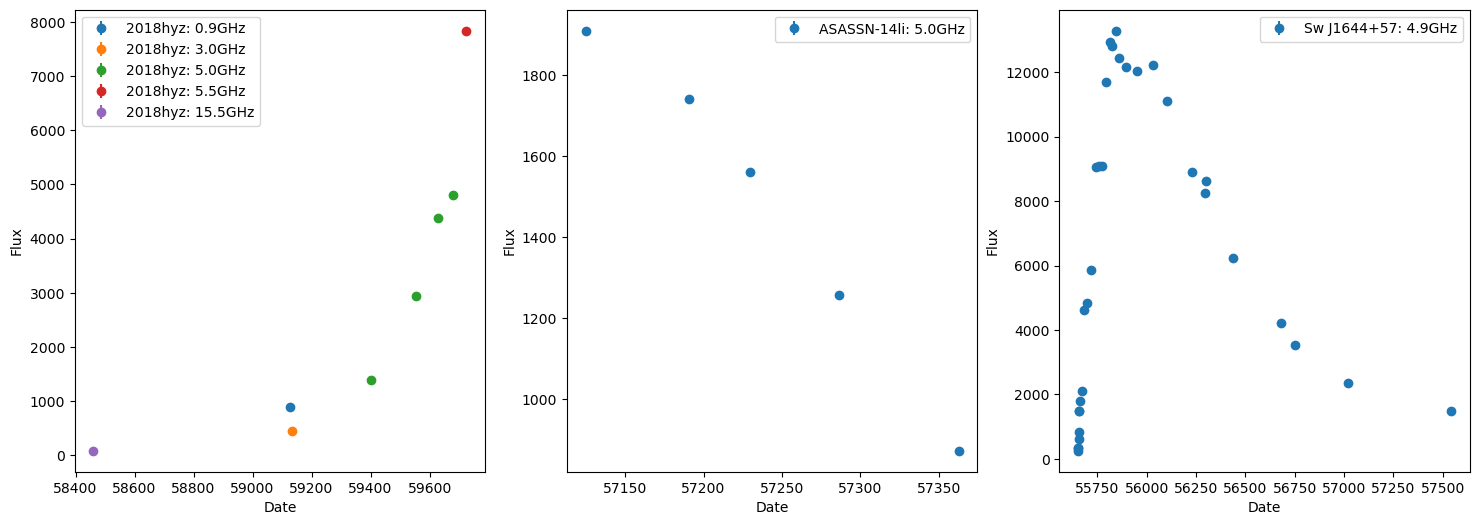

In [28]:
fig, axs = plt.subplots(1,3, figsize=(18,6))

for (name, data), ax in zip(radiophot.groupby('name'), axs):
    for (f, df) in data.groupby('converted_freq'):
        fig = otter.plotter.plotter.plot_light_curve(date=df.converted_date, 
                                             flux=df.converted_flux,
                                             flux_err=df.converted_flux_err,
                                             ax=ax,
                                             fig=fig,
                                             marker='o',
                                             linestyle='none',
                                             label=f'{name}: {f}GHz')
        
    ax.legend()

Where the colors represent the observation frequency! Obviously these are not pubblication ready but they are at least a good way to easily visualize the data while working with it.